In [1]:
#%matplotlib notebook

In [2]:
import requests
import os
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
award_csv = 'Final_Award_Data.csv'
award_df = pd.read_csv(award_csv)

grossing_csv = 'Final_Grossing_Data.csv'
grossing_df = pd.read_csv(grossing_csv)

In [4]:
award_df.head()

,Award,Year,Movie Title,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating
0,OUTSTANDING PICTURE,1927,Wings,"Drama, Romance, War, Action",144 min,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5/10,93%
1,OUTSTANDING PICTURE,1928,The Broadway Melody,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7/10,36%
2,OUTSTANDING PRODUCTION,1929,All Quiet on the Western Front,"Drama, War",152 min,"Louis Wolheim, Lew Ayres, John Wray, Arnold Lucy",8.0/10,98%
3,OUTSTANDING PRODUCTION,1930,Cimarron,"Drama, Western",123 min,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",5.9/10,52%
4,OUTSTANDING PRODUCTION,1931,Grand Hotel,"Drama, Romance",112 min,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",7.4/10,88%


In [5]:
award_df[['Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Genre 5']] = award_df['Movie Genre'].str.split(",",expand = True)

award_df.head(50)

,Award,Year,Movie Title,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5
0,OUTSTANDING PICTURE,1927,Wings,"Drama, Romance, War, Action",144 min,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5/10,93%,Drama,Romance,War,Action,None
1,OUTSTANDING PICTURE,1928,The Broadway Melody,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7/10,36%,Drama,Musical,Romance,None,None
2,OUTSTANDING PRODUCTION,1929,All Quiet on the Western Front,"Drama, War",152 min,"Louis Wolheim, Lew Ayres, John Wray, Arnold Lucy",8.0/10,98%,Drama,War,None,None,None
3,OUTSTANDING PRODUCTION,1930,Cimarron,"Drama, Western",123 min,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",5.9/10,52%,Drama,Western,None,None,None
4,OUTSTANDING PRODUCTION,1931,Grand Hotel,"Drama, Romance",112 min,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",7.4/10,88%,Drama,Romance,None,None,None
5,OUTSTANDING PRODUCTION,1932,Cavalcade,"Drama, Romance, War",112 min,"Diana Wynyard, Clive Brook, Una O'Connor, Herb...",5.8/10,61%,Drama,Romance,War,None,None
6,OUTSTANDING PRODUCTION,1933,Cavalcade,"Drama, Romance, War",112 min,"Diana Wynyard, Clive Brook, Una O'Connor, Herb...",5.8/10,61%,Drama,Romance,War,None,None
7,OUTSTANDING PRODUCTION,1934,It Happened One Night,"Comedy, Romance",105 min,"Clark Gable, Claudette Colbert, Walter Connoll...",8.1/10,98%,Comedy,Romance,None,None,None
8,OUTSTANDING PRODUCTION,1935,Mutiny on the Bounty,"Adventure, Biography, Drama, History, Romance",132 min,"Charles Laughton, Clark Gable, Franchot Tone, ...",7.7/10,93%,Adventure,Biography,Drama,History,Romance
9,OUTSTANDING PRODUCTION,1936,The Great Ziegfeld,"Biography, Drama, Musical, Romance",176 min,"William Powell, Myrna Loy, Luise Rainer, Frank...",6.7/10,66%,Biography,Drama,Musical,Romance,None


In [6]:
award_df['Genre 1'] = award_df['Genre 1'].str.strip()
award_df['Genre 2'] = award_df['Genre 2'].str.strip()
award_df['Genre 3'] = award_df['Genre 3'].str.strip()
award_df['Genre 4'] = award_df['Genre 4'].str.strip()
award_df['Genre 5'] = award_df['Genre 5'].str.strip()

In [7]:
award_df[['Minutes', 'Minutes 2']] = award_df['Runtime'].str.split(" ",expand = True)
award_df.head()

,Award,Year,Movie Title,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Minutes,Minutes 2
0,OUTSTANDING PICTURE,1927,Wings,"Drama, Romance, War, Action",144 min,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5/10,93%,Drama,Romance,War,Action,None,144,min
1,OUTSTANDING PICTURE,1928,The Broadway Melody,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7/10,36%,Drama,Musical,Romance,None,None,100,min
2,OUTSTANDING PRODUCTION,1929,All Quiet on the Western Front,"Drama, War",152 min,"Louis Wolheim, Lew Ayres, John Wray, Arnold Lucy",8.0/10,98%,Drama,War,None,None,None,152,min
3,OUTSTANDING PRODUCTION,1930,Cimarron,"Drama, Western",123 min,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",5.9/10,52%,Drama,Western,None,None,None,123,min
4,OUTSTANDING PRODUCTION,1931,Grand Hotel,"Drama, Romance",112 min,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",7.4/10,88%,Drama,Romance,None,None,None,112,min


In [8]:
award_df.loc[award_df['Rotten Tomatoes Rating']=='37/100']

,Award,Year,Movie Title,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Minutes,Minutes 2
22,BEST MOTION PICTURE,1949,All the King's Men,"Drama, Thriller",128 min,"Sean Penn, Jude Law, Anthony Hopkins, Kate Win...",6.2/10,37/100,Drama,Thriller,None,None,None,128,min


In [9]:
award_df = award_df.replace(to_replace = ["37/100"], value = "37%")


In [10]:
award_df['Rotten Tomatoes Rating'] = award_df['Rotten Tomatoes Rating'].str.replace(r'%', r'.0').astype('float')


In [11]:
award_df['Minutes'] = award_df['Minutes'].astype('float')

award_df.head()

,Award,Year,Movie Title,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Minutes,Minutes 2
0,OUTSTANDING PICTURE,1927,Wings,"Drama, Romance, War, Action",144 min,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5/10,93.0,Drama,Romance,War,Action,None,144.0,min
1,OUTSTANDING PICTURE,1928,The Broadway Melody,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7/10,36.0,Drama,Musical,Romance,None,None,100.0,min
2,OUTSTANDING PRODUCTION,1929,All Quiet on the Western Front,"Drama, War",152 min,"Louis Wolheim, Lew Ayres, John Wray, Arnold Lucy",8.0/10,98.0,Drama,War,None,None,None,152.0,min
3,OUTSTANDING PRODUCTION,1930,Cimarron,"Drama, Western",123 min,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",5.9/10,52.0,Drama,Western,None,None,None,123.0,min
4,OUTSTANDING PRODUCTION,1931,Grand Hotel,"Drama, Romance",112 min,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",7.4/10,88.0,Drama,Romance,None,None,None,112.0,min


In [12]:
award_df['IMDB Rating'] = award_df['IMDB Rating'].str.replace(r'/10', r'').astype('float')

award_df.head()

,Award,Year,Movie Title,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Minutes,Minutes 2
0,OUTSTANDING PICTURE,1927,Wings,"Drama, Romance, War, Action",144 min,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,93.0,Drama,Romance,War,Action,None,144.0,min
1,OUTSTANDING PICTURE,1928,The Broadway Melody,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7,36.0,Drama,Musical,Romance,None,None,100.0,min
2,OUTSTANDING PRODUCTION,1929,All Quiet on the Western Front,"Drama, War",152 min,"Louis Wolheim, Lew Ayres, John Wray, Arnold Lucy",8.0,98.0,Drama,War,None,None,None,152.0,min
3,OUTSTANDING PRODUCTION,1930,Cimarron,"Drama, Western",123 min,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",5.9,52.0,Drama,Western,None,None,None,123.0,min
4,OUTSTANDING PRODUCTION,1931,Grand Hotel,"Drama, Romance",112 min,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",7.4,88.0,Drama,Romance,None,None,None,112.0,min


In [13]:
award_df = award_df.replace(to_replace = [None], value = "")
award_df.head()

,Award,Year,Movie Title,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Minutes,Minutes 2
0,OUTSTANDING PICTURE,1927,Wings,"Drama, Romance, War, Action",144 min,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,93.0,Drama,Romance,War,Action,,144.0,min
1,OUTSTANDING PICTURE,1928,The Broadway Melody,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7,36.0,Drama,Musical,Romance,,,100.0,min
2,OUTSTANDING PRODUCTION,1929,All Quiet on the Western Front,"Drama, War",152 min,"Louis Wolheim, Lew Ayres, John Wray, Arnold Lucy",8.0,98.0,Drama,War,,,,152.0,min
3,OUTSTANDING PRODUCTION,1930,Cimarron,"Drama, Western",123 min,"Richard Dix, Irene Dunne, Estelle Taylor, Nanc...",5.9,52.0,Drama,Western,,,,123.0,min
4,OUTSTANDING PRODUCTION,1931,Grand Hotel,"Drama, Romance",112 min,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",7.4,88.0,Drama,Romance,,,,112.0,min


In [14]:
#np.unique(df[['Col1', 'Col2']].values)

genre_list = list(set(list(np.unique(award_df[['Genre 1','Genre 2','Genre 3', 'Genre 4','Genre 5']].values))[1:]))

In [15]:
genre_list

['Comedy',
 'Film-Noir',
 'Music',
 'Romance',
 'Fantasy',
 'Thriller',
 'Adventure',
 'Family',
 'Musical',
 'Action',
 'War',
 'Sport',
 'Biography',
 'Drama',
 'Western',
 'History',
 'Mystery',
 'Crime']

In [16]:
genre_counts = []

for genre in genre_list:
    
    genre_count = ((award_df['Genre 1'] == genre) | (award_df['Genre 2'] == genre) | (award_df['Genre 3'] == genre) | (award_df['Genre 4'] == genre) | (award_df['Genre 5'] == genre)).sum()
    
    genre_counts.append(genre_count)
    

In [17]:
genre_counts

[16, 1, 3, 33, 2, 13, 10, 6, 9, 4, 17, 3, 20, 87, 4, 14, 2, 13]

In [18]:
genre_df = pd.DataFrame({
    'Genre': genre_list,
    'Count': genre_counts    
})

genre_df.sort_values(by=['Count'], ascending = False)

,Genre,Count
13,Drama,87
3,Romance,33
12,Biography,20
10,War,17
0,Comedy,16
15,History,14
17,Crime,13
5,Thriller,13
6,Adventure,10
8,Musical,9


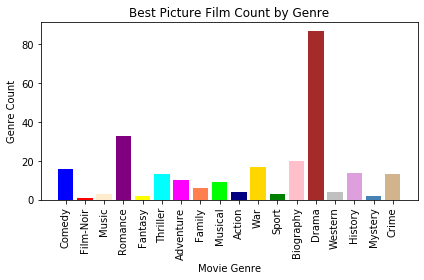

<Figure size 432x288 with 0 Axes>

In [90]:
#test = plt.bar(genre_list, genre_counts)

#test[0].set_color('r')

colors = ['blue', 'red', 'blanchedalmond','purple','yellow','aqua','magenta','coral','lime','navy','gold','green','pink','brown',\
         'silver','plum','steelblue','tan', 'maroon', 'slategray','lemonchiffon','orange']

plt.bar(genre_list, genre_counts, color = colors)

tick_locations = [value for value in genre_list]
plt.xticks(tick_locations, rotation = 'vertical')
plt.xlabel('Movie Genre')
plt.ylabel('Genre Count')
plt.title('Best Picture Film Count by Genre')

plt.tight_layout()
plt.show()

plt.savefig("Images/Best_Picture_Genre.png")

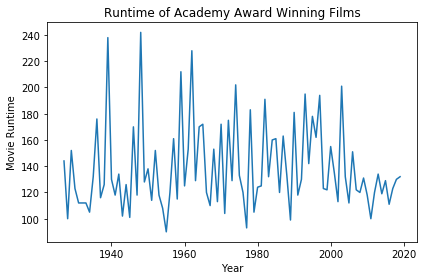

In [20]:
plt.plot(award_df['Year'], award_df['Minutes'])

plt.xlabel('Year')
plt.ylabel('Movie Runtime')
plt.title('Runtime of Academy Award Winning Films')

plt.tight_layout()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

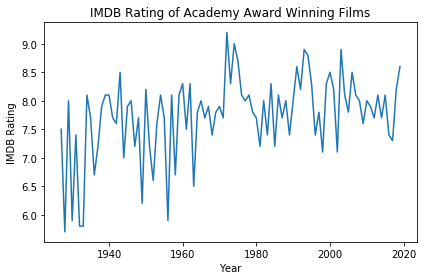

In [21]:
plt.plot(award_df['Year'], award_df['IMDB Rating'])

plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.title('IMDB Rating of Academy Award Winning Films')

plt.tight_layout()

plt.show

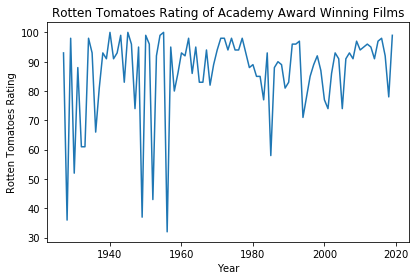

In [22]:
plt.plot(award_df['Year'], award_df['Rotten Tomatoes Rating'])

plt.xlabel('Year')
plt.ylabel('Rotten Tomatoes Rating')
plt.title('Rotten Tomatoes Rating of Academy Award Winning Films')

plt.tight_layout()

plt.show()

In [23]:
print('\U0001F92E')
 


🤮


In [24]:
grossing_df.head()

,Year,Movie ID,Movie Title,Revenue,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,NaN,NaN,NaN,NaN,NaN
1,1928,173689,Lights of New York,1200000,"Crime, Drama, Music, Romance",57 min,"Helene Costello, Cullen Landis, Mary Carr, Whe...",5.7/10,NaN
2,1929,65203,The Broadway Melody,4358000,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7/10,36%
3,1930,166307,Tom Sawyer,11000000,"Adventure, Musical, Family",103 min,"Johnny Whitaker, Celeste Holm, Warren Oates, J...",6.5/10,NaN
4,1931,3035,Frankenstein,12000000,"Drama, Horror, Sci-Fi",70 min,"Colin Clive, Mae Clarke, John Boles, Boris Kar...",7.8/10,100%


In [25]:
grossing_df[['Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Genre 5', 'Genre 6', 'Genre 7']] = grossing_df['Movie Genre'].str.split(",",expand = True)

grossing_df.head(50)

,Year,Movie ID,Movie Title,Revenue,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928,173689,Lights of New York,1200000,"Crime, Drama, Music, Romance",57 min,"Helene Costello, Cullen Landis, Mary Carr, Whe...",5.7/10,NaN,Crime,Drama,Music,Romance,None,None,None
2,1929,65203,The Broadway Melody,4358000,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7/10,36%,Drama,Musical,Romance,None,None,None,None
3,1930,166307,Tom Sawyer,11000000,"Adventure, Musical, Family",103 min,"Johnny Whitaker, Celeste Holm, Warren Oates, J...",6.5/10,NaN,Adventure,Musical,Family,None,None,None,None
4,1931,3035,Frankenstein,12000000,"Drama, Horror, Sci-Fi",70 min,"Colin Clive, Mae Clarke, John Boles, Boris Kar...",7.8/10,100%,Drama,Horror,Sci-Fi,None,None,None,None
5,1932,33680,Grand Hotel,2594000,"Drama, Romance",112 min,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",7.4/10,88%,Drama,Romance,None,None,None,None,None
6,1933,244,King Kong,10000000,"Action, Adventure, Drama, Romance",187 min,"Naomi Watts, Jack Black, Adrien Brody, Thomas ...",7.2/10,84%,Action,Adventure,Drama,Romance,None,None,None
7,1934,8208,The Man Who Knew Too Much,10250000,"Drama, Thriller",120 min,"James Stewart, Doris Day, Brenda de Banzie, Be...",7.5/10,87%,Drama,Thriller,None,None,None,None,None
8,1935,12311,Mutiny on the Bounty,4460000,"Adventure, Biography, Drama, History, Romance",132 min,"Charles Laughton, Clark Gable, Franchot Tone, ...",7.7/10,93%,Adventure,Biography,Drama,History,Romance,None,None
9,1936,3082,Modern Times,8500000,"Comedy, Drama, Family, Romance",87 min,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.5/10,100%,Comedy,Drama,Family,Romance,None,None,None


In [26]:
grossing_df['Genre 1'] = grossing_df['Genre 1'].str.strip()
grossing_df['Genre 2'] = grossing_df['Genre 2'].str.strip()
grossing_df['Genre 3'] = grossing_df['Genre 3'].str.strip()
grossing_df['Genre 4'] = grossing_df['Genre 4'].str.strip()
grossing_df['Genre 5'] = grossing_df['Genre 5'].str.strip()

In [27]:
grossing_df[['Minutes', 'Minutes 2']] = grossing_df['Runtime'].str.split(" ",expand = True)
grossing_df.head()

,Year,Movie ID,Movie Title,Revenue,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Minutes,Minutes 2
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928,173689,Lights of New York,1200000,"Crime, Drama, Music, Romance",57 min,"Helene Costello, Cullen Landis, Mary Carr, Whe...",5.7/10,NaN,Crime,Drama,Music,Romance,None,None,None,57,min
2,1929,65203,The Broadway Melody,4358000,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7/10,36%,Drama,Musical,Romance,None,None,None,None,100,min
3,1930,166307,Tom Sawyer,11000000,"Adventure, Musical, Family",103 min,"Johnny Whitaker, Celeste Holm, Warren Oates, J...",6.5/10,NaN,Adventure,Musical,Family,None,None,None,None,103,min
4,1931,3035,Frankenstein,12000000,"Drama, Horror, Sci-Fi",70 min,"Colin Clive, Mae Clarke, John Boles, Boris Kar...",7.8/10,100%,Drama,Horror,Sci-Fi,None,None,None,None,70,min


In [28]:
grossing_df.loc[grossing_df['Rotten Tomatoes Rating']=='95/100']

,Year,Movie ID,Movie Title,Revenue,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Minutes,Minutes 2
10,1937,408,Snow White and the Seven Dwarfs,184925486,"Animation, Family, Fantasy, Musical, Romance",83 min,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",7.6/10,95/100,Animation,Family,Fantasy,Musical,Romance,None,None,83,min


In [29]:
grossing_df = grossing_df.replace(to_replace = ["95/100"], value = "95%")
grossing_df = grossing_df.replace(to_replace = ["59/100"], value = "59%")

In [30]:
grossing_df['Rotten Tomatoes Rating'] = grossing_df['Rotten Tomatoes Rating'].str.replace(r'%', r'.0').astype('float')

In [31]:
grossing_df['Minutes'] = grossing_df['Minutes'].astype('float')

grossing_df.head()

,Year,Movie ID,Movie Title,Revenue,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Minutes,Minutes 2
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928,173689,Lights of New York,1200000,"Crime, Drama, Music, Romance",57 min,"Helene Costello, Cullen Landis, Mary Carr, Whe...",5.7/10,NaN,Crime,Drama,Music,Romance,None,None,None,57.0,min
2,1929,65203,The Broadway Melody,4358000,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7/10,36.0,Drama,Musical,Romance,None,None,None,None,100.0,min
3,1930,166307,Tom Sawyer,11000000,"Adventure, Musical, Family",103 min,"Johnny Whitaker, Celeste Holm, Warren Oates, J...",6.5/10,NaN,Adventure,Musical,Family,None,None,None,None,103.0,min
4,1931,3035,Frankenstein,12000000,"Drama, Horror, Sci-Fi",70 min,"Colin Clive, Mae Clarke, John Boles, Boris Kar...",7.8/10,100.0,Drama,Horror,Sci-Fi,None,None,None,None,70.0,min


In [32]:
grossing_df['IMDB Rating'] = grossing_df['IMDB Rating'].str.replace(r'/10', r'').astype('float')

grossing_df.head()

,Year,Movie ID,Movie Title,Revenue,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Minutes,Minutes 2
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928,173689,Lights of New York,1200000,"Crime, Drama, Music, Romance",57 min,"Helene Costello, Cullen Landis, Mary Carr, Whe...",5.7,NaN,Crime,Drama,Music,Romance,None,None,None,57.0,min
2,1929,65203,The Broadway Melody,4358000,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7,36.0,Drama,Musical,Romance,None,None,None,None,100.0,min
3,1930,166307,Tom Sawyer,11000000,"Adventure, Musical, Family",103 min,"Johnny Whitaker, Celeste Holm, Warren Oates, J...",6.5,NaN,Adventure,Musical,Family,None,None,None,None,103.0,min
4,1931,3035,Frankenstein,12000000,"Drama, Horror, Sci-Fi",70 min,"Colin Clive, Mae Clarke, John Boles, Boris Kar...",7.8,100.0,Drama,Horror,Sci-Fi,None,None,None,None,70.0,min


In [33]:
grossing_df = grossing_df.replace(to_replace = [None], value = "")
grossing_df.head()

,Year,Movie ID,Movie Title,Revenue,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Minutes,Minutes 2
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,,,,NaN,NaN,,,,,,,,NaN,
1,1928,173689,Lights of New York,1200000,"Crime, Drama, Music, Romance",57 min,"Helene Costello, Cullen Landis, Mary Carr, Whe...",5.7,NaN,Crime,Drama,Music,Romance,,,,57.0,min
2,1929,65203,The Broadway Melody,4358000,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7,36.0,Drama,Musical,Romance,,,,,100.0,min
3,1930,166307,Tom Sawyer,11000000,"Adventure, Musical, Family",103 min,"Johnny Whitaker, Celeste Holm, Warren Oates, J...",6.5,NaN,Adventure,Musical,Family,,,,,103.0,min
4,1931,3035,Frankenstein,12000000,"Drama, Horror, Sci-Fi",70 min,"Colin Clive, Mae Clarke, John Boles, Boris Kar...",7.8,100.0,Drama,Horror,Sci-Fi,,,,,70.0,min


In [34]:
genre_list_2 = list(set(list(np.unique(grossing_df[['Genre 1','Genre 2','Genre 3', 'Genre 4','Genre 5']].values))[1:]))

In [35]:
genre_list_2

['Music',
 'Romance',
 'Fantasy',
 'Adventure',
 'Musical',
 'News',
 'Sci-Fi',
 'History',
 'Comedy',
 'Documentary',
 'Horror',
 'Action',
 'Drama',
 'Western',
 'Short',
 'Thriller',
 'Family',
 'Biography',
 'Crime',
 'Animation',
 'War',
 'Mystery']

In [36]:
genre_counts_2 = []

for genre in genre_list_2:
    
    genre_count_2 = ((grossing_df['Genre 1'] == genre) | (grossing_df['Genre 2'] == genre) | (grossing_df['Genre 3'] == genre) | (grossing_df['Genre 4'] == genre) | (grossing_df['Genre 5'] == genre)).sum()
    
    genre_counts_2.append(genre_count_2)

In [37]:
genre_counts_2

[2, 20, 25, 50, 8, 1, 21, 7, 13, 3, 3, 30, 42, 3, 3, 13, 22, 4, 5, 12, 3, 4]

In [38]:
genre_2_df = pd.DataFrame({
    'Genre': genre_list_2,
    'Count': genre_counts_2    
})

genre_2_df.sort_values(by=['Count'], ascending = False)

,Genre,Count
3,Adventure,50
12,Drama,42
11,Action,30
2,Fantasy,25
16,Family,22
6,Sci-Fi,21
1,Romance,20
15,Thriller,13
8,Comedy,13
19,Animation,12


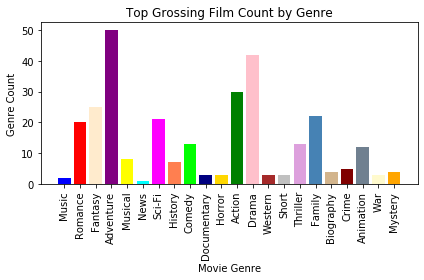

<Figure size 432x288 with 0 Axes>

In [91]:


colors = ['blue', 'red', 'blanchedalmond','purple','yellow','aqua','magenta','coral','lime','navy','gold','green','pink','brown',\
         'silver','plum','steelblue','tan', 'maroon', 'slategray','lemonchiffon','orange']

plt.bar(genre_list_2, genre_counts_2, color=colors)

tick_locations = [value for value in genre_list_2]
plt.xticks(tick_locations, rotation = 'vertical')
plt.xlabel('Movie Genre')
plt.ylabel('Genre Count')
plt.title('Top Grossing Film Count by Genre')

plt.tight_layout()

plt.show()

plt.savefig("Images/Top_Grossing_Genre.png")


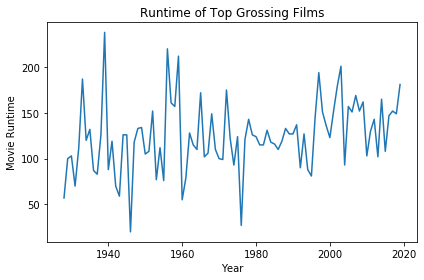

In [40]:
plt.plot(grossing_df['Year'], grossing_df['Minutes'])

plt.xlabel('Year')
plt.ylabel('Movie Runtime')
plt.title('Runtime of Top Grossing Films')

plt.tight_layout()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

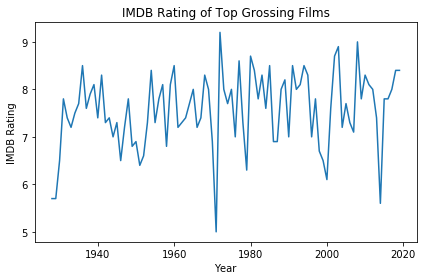

In [41]:
plt.plot(grossing_df['Year'], grossing_df['IMDB Rating'])

plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.title('IMDB Rating of Top Grossing Films')

plt.tight_layout()

plt.show

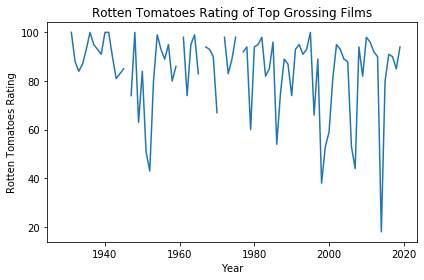

In [42]:
plt.plot(grossing_df['Year'], grossing_df['Rotten Tomatoes Rating'])

plt.xlabel('Year')
plt.ylabel('Rotten Tomatoes Rating')
plt.title('Rotten Tomatoes Rating of Top Grossing Films')

plt.tight_layout()

plt.show()

In [43]:
grossing_df

,Year,Movie ID,Movie Title,Revenue,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Minutes,Minutes 2
0,1927,287262,The Battles of the Coronel and Falkland Islands,6241682,,,,NaN,NaN,,,,,,,,NaN,
1,1928,173689,Lights of New York,1200000,"Crime, Drama, Music, Romance",57 min,"Helene Costello, Cullen Landis, Mary Carr, Whe...",5.7,NaN,Crime,Drama,Music,Romance,,,,57.0,min
2,1929,65203,The Broadway Melody,4358000,"Drama, Musical, Romance",100 min,"Charles King, Anita Page, Bessie Love",5.7,36.0,Drama,Musical,Romance,,,,,100.0,min
3,1930,166307,Tom Sawyer,11000000,"Adventure, Musical, Family",103 min,"Johnny Whitaker, Celeste Holm, Warren Oates, J...",6.5,NaN,Adventure,Musical,Family,,,,,103.0,min
4,1931,3035,Frankenstein,12000000,"Drama, Horror, Sci-Fi",70 min,"Colin Clive, Mae Clarke, John Boles, Boris Kar...",7.8,100.0,Drama,Horror,Sci-Fi,,,,,70.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2015,140607,Star Wars: The Force Awakens,2068223624,News,108 min,"J.J. Abrams, John Boyega, Anthony Carboni, Gwe...",7.8,80.0,News,,,,,,,108.0,min
89,2016,271110,Captain America: Civil War,1153296293,"Action, Adventure, Sci-Fi",147 min,"Chris Evans, Robert Downey Jr., Scarlett Johan...",7.8,91.0,Action,Adventure,Sci-Fi,,,,,147.0,min
90,2017,181808,Star Wars: The Last Jedi,1332539889,"Short, Action, Fantasy, Sci-Fi",152 min,Taylor Clark,8.0,90.0,Short,Action,Fantasy,Sci-Fi,,,,152.0,min
91,2018,299536,Avengers: Infinity War,2046239637,"Action, Adventure, Sci-Fi",149 min,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,85.0,Action,Adventure,Sci-Fi,,,,,149.0,min


In [44]:
print('\U0001F92E')

🤮


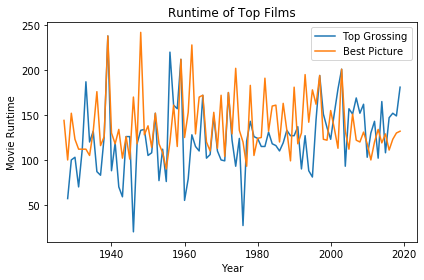

<Figure size 432x288 with 0 Axes>

In [92]:
plt.plot(grossing_df['Year'], grossing_df['Minutes'], label = 'Top Grossing')

plt.plot(award_df['Year'], award_df['Minutes'],label = 'Best Picture')

plt.xlabel('Year')
plt.ylabel('Movie Runtime')
plt.title('Runtime of Top Films')
plt.legend(loc = 'best')

plt.tight_layout()

plt.show()

plt.savefig("Images/Runtime_Comparison.png")


In [46]:
grossing_df[['Minutes']].describe()

,Minutes
count,92.000000
mean,124.423913
std,38.620507
min,20.000000
25%,102.750000
50%,123.500000
75%,149.000000
max,238.000000


In [47]:
award_df[['Minutes']].describe()

,Minutes
count,93.000000
mean,138.440860
std,32.671109
min,90.000000
25%,118.000000
50%,129.000000
75%,155.000000
max,242.000000


In [48]:
grossing_df['Minutes'].sum()/60

190.78333333333333

In [49]:
award_df['Minutes'].sum()/60

214.58333333333334

In [50]:
print('\U0001F92F')

🤯


In [51]:


award_score_df = pd.DataFrame ({
    
    'Year': award_df['Year'],
    'Best Picture IMDB': award_df['IMDB Rating'], 
    'Best Picture Rotten Tomatoes Rating': award_df['Rotten Tomatoes Rating'],
    'Top Grossing IMDB': grossing_df['IMDB Rating'], 
    'Top Grossing Rotten Tomatoes Rating': grossing_df['Rotten Tomatoes Rating']
})

award_score_df

,Year,Best Picture IMDB,Best Picture Rotten Tomatoes Rating,Top Grossing IMDB,Top Grossing Rotten Tomatoes Rating
0,1927,7.5,93.0,NaN,NaN
1,1928,5.7,36.0,5.7,NaN
2,1929,8.0,98.0,5.7,36.0
3,1930,5.9,52.0,6.5,NaN
4,1931,7.4,88.0,7.8,100.0
...,...,...,...,...,...
88,2015,8.1,97.0,7.8,80.0
89,2016,7.4,98.0,7.8,91.0
90,2017,7.3,92.0,8.0,90.0
91,2018,8.2,78.0,8.4,85.0


In [59]:
award_score_df = award_score_df.replace(np.nan, 0)

#award_df = award_df.replace(to_replace = [None], value = "")

#df1 = df.replace(np.nan, '', regex=True)


award_score_df


,Year,Best Picture IMDB,Best Picture Rotten Tomatoes Rating,Top Grossing IMDB,Top Grossing Rotten Tomatoes Rating
0,1927,7.5,93.0,0.0,0.0
1,1928,5.7,36.0,5.7,0.0
2,1929,8.0,98.0,5.7,36.0
3,1930,5.9,52.0,6.5,0.0
4,1931,7.4,88.0,7.8,100.0
...,...,...,...,...,...
88,2015,8.1,97.0,7.8,80.0
89,2016,7.4,98.0,7.8,91.0
90,2017,7.3,92.0,8.0,90.0
91,2018,8.2,78.0,8.4,85.0


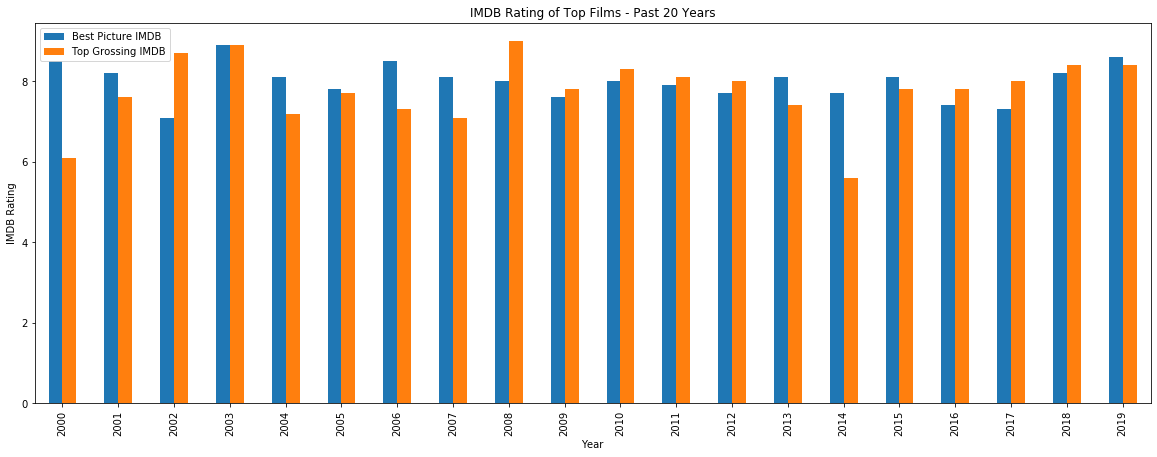

In [93]:
#award_score_df.plot(x=award_score_df['Year'], y= [award_score_df['Best Picture IMDB'],award_score_df['Top Grossing IMDB']], kind = 'bar')

#plt.figure(figsize = (20,7))
award_score_df[award_score_df['Year']>1999].plot('Year',['Best Picture IMDB', 'Top Grossing IMDB'], kind = 'bar',figsize = (20,7))
plt.ylabel('IMDB Rating')
plt.title('IMDB Rating of Top Films - Past 20 Years')

plt.savefig("Images/IMDB_Rating.png")

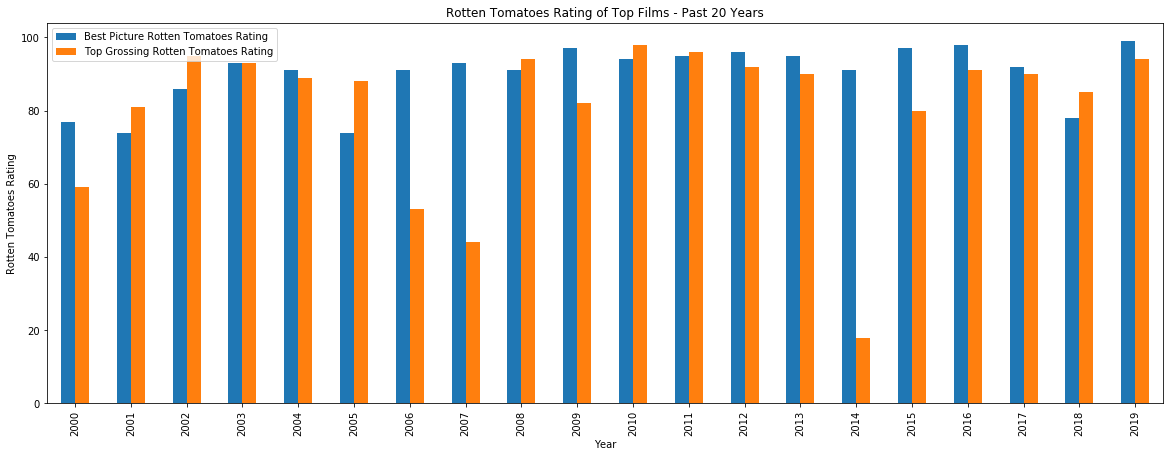

In [94]:
award_score_df[award_score_df['Year']>1999].plot('Year',['Best Picture Rotten Tomatoes Rating', 'Top Grossing Rotten Tomatoes Rating'], kind = 'bar',figsize = (20,7))
plt.ylabel('Rotten Tomatoes Rating')

plt.title('Rotten Tomatoes Rating of Top Films - Past 20 Years')

plt.savefig("Images/Rotten_Tomatoes_Rating.png")